### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score
import math
import ipywidgets as widgets
from scipy.stats import norm
sns.set(rc={'figure.figsize':(12,9)})

#TO REMOVE SETTINGWITHCOPYWARNING
pd.set_option('mode.chained_assignment', None)

### Importing Data
• This is what the data looks like.

In [2]:
df=pd.read_csv('train.csv')

#Replacing Year built with Age of property
df=df.apply(lambda i:2021-i if i.name == 'YearBuilt' else i)
df.rename(columns = {'YearBuilt':'Age'}, inplace = True)
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


### Correlation Plot

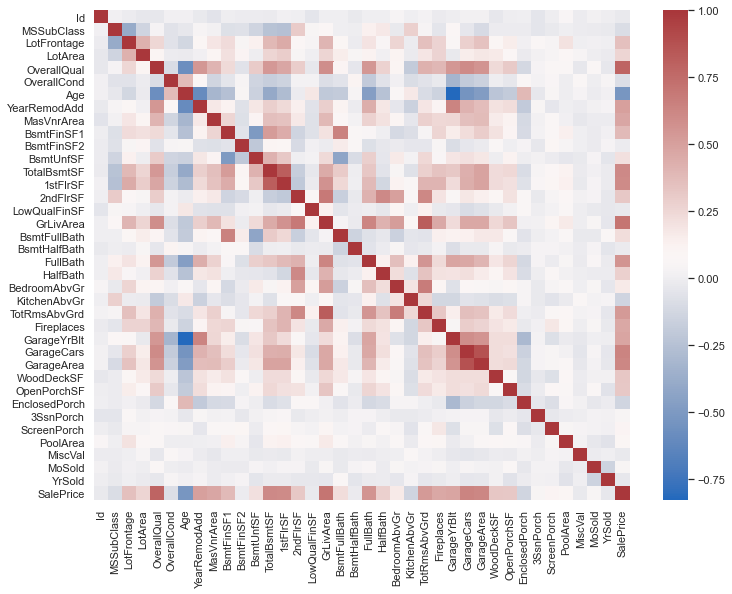

In [3]:
corr=df.corr()
sns.heatmap(corr,xticklabels=True,yticklabels=True,cmap='vlag')
plt.show()

### Correlation Plot with values>0.5

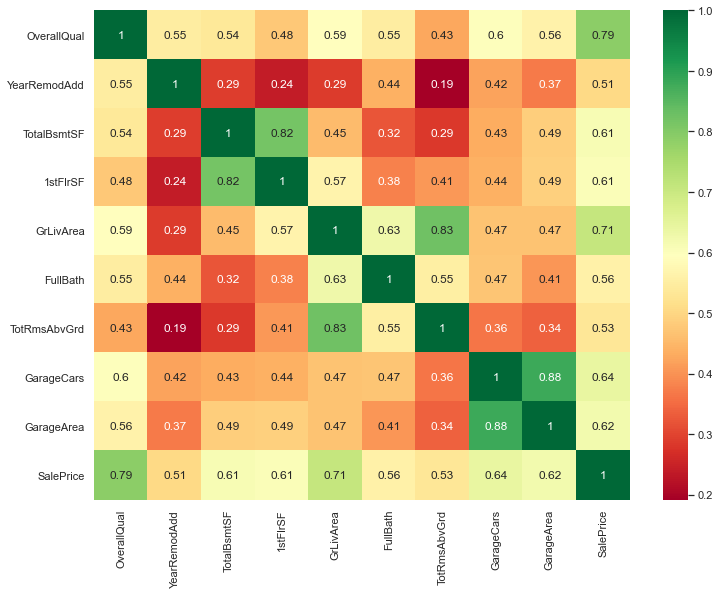

In [4]:
new_corr=corr.index[corr['SalePrice']>0.5]
sns.heatmap(df[new_corr].corr(),xticklabels=True,yticklabels=True,annot=True,cmap='RdYlGn')
plt.show()

### Trimming down dataframe to most correlated fields

• The most correlated fields to SalePrice are GrLivArea, GarageArea, GarageCars, TotalBsmtSF and OverallQual. Since OverallQuall is highly correlated to other fields, we'll be removing it from out features list as it may cause collinearity.

In [5]:
df=df[['GrLivArea','GarageArea','GarageCars','TotalBsmtSF','SalePrice']]

### Linear Regression SalePrice Vs GrLivArea

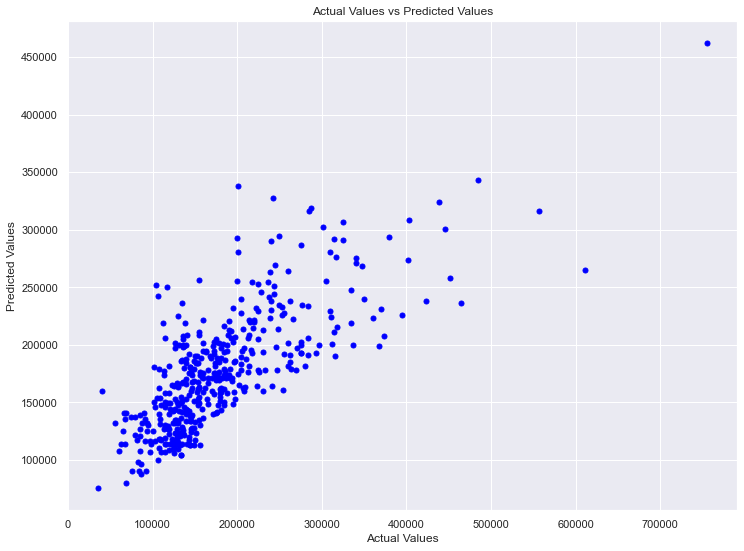

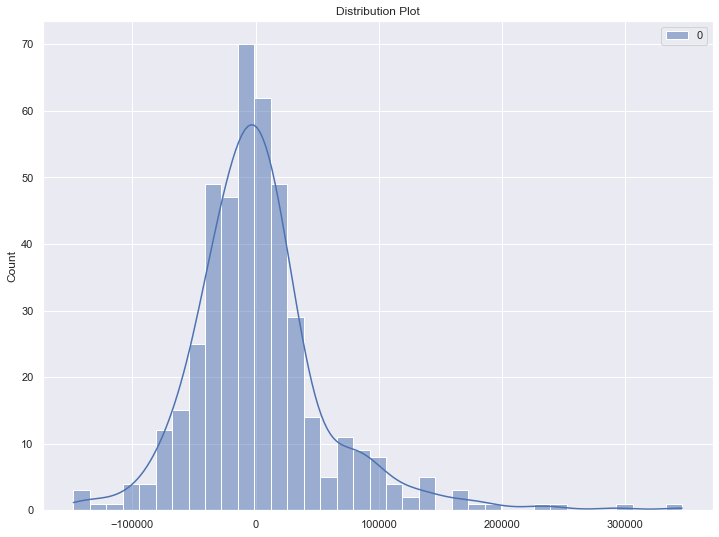

The MSLE is: 0.005628049300362616.
The R2 Score is: 0.5507664896759454.



In [6]:
x = df['GrLivArea'].values.reshape(-1,1)
y = df['SalePrice'].values.reshape(-1,1)

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3, random_state=42)

regressor = LinearRegression()
regressor.fit(xTrain, yTrain)
yPred = regressor.predict(xTest)

plt.scatter(yTest, yPred, color='blue', marker='o', s=25)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual Values vs Predicted Values')
plt.show()

sns.histplot(yTest-yPred,kde=True).set_title("Distribution Plot")
plt.show()

print('The MSLE is: '+str((mean_squared_log_error(yTest,yPred))**2)+'.')
print('The R2 Score is: '+str(r2_score(yTest,yPred))+'.\n')

### Linear Regression SalePrice Vs GarageArea

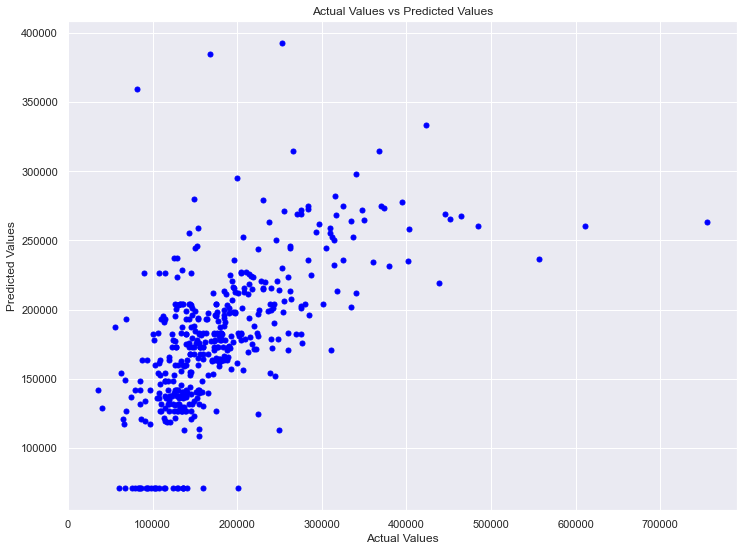

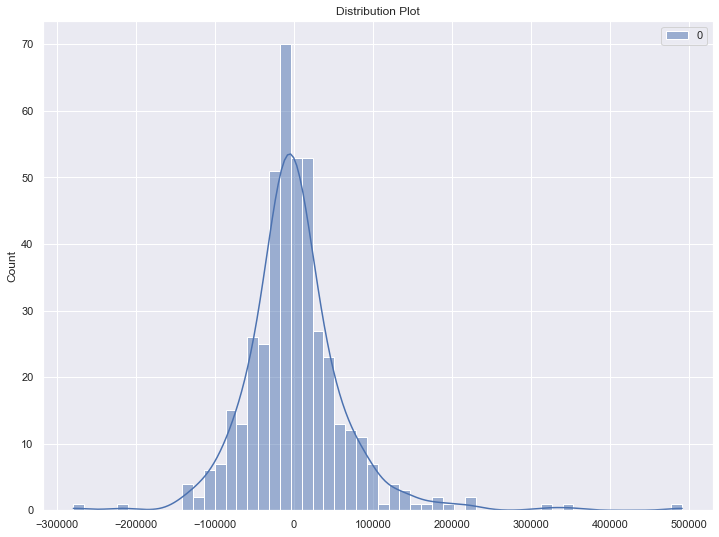

The MSLE is: 0.01188477779048212.
The R2 Score is: 0.39215375667146046.



In [7]:
x = df['GarageArea'].values.reshape(-1,1)
y = df['SalePrice'].values.reshape(-1,1)

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3, random_state=42)

regressor = LinearRegression()
regressor.fit(xTrain, yTrain)
yPred = regressor.predict(xTest)

plt.scatter(yTest, yPred, color='blue', marker='o', s=25)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual Values vs Predicted Values')
plt.show()

sns.histplot(yTest-yPred,kde=True).set_title("Distribution Plot")
plt.show()

print('The MSLE is: '+str((mean_squared_log_error(yTest,yPred))**2)+'.')
print('The R2 Score is: '+str(r2_score(yTest,yPred))+'.\n')

### Linear Regression SalePrice Vs GarageCars

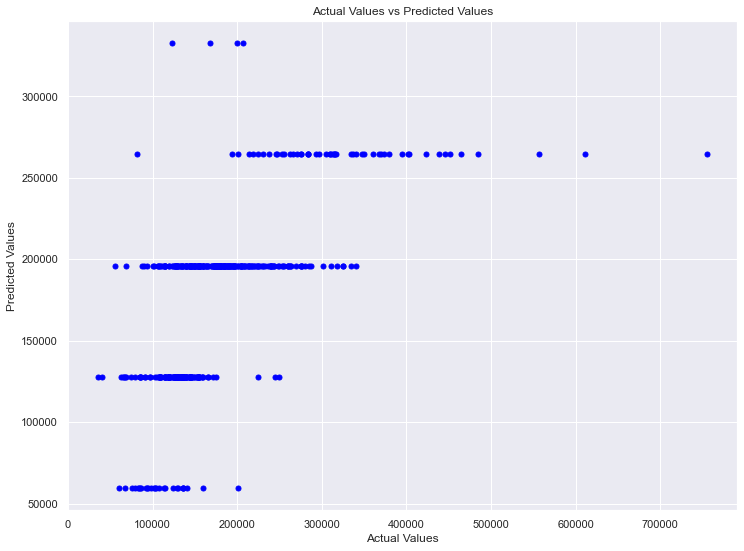

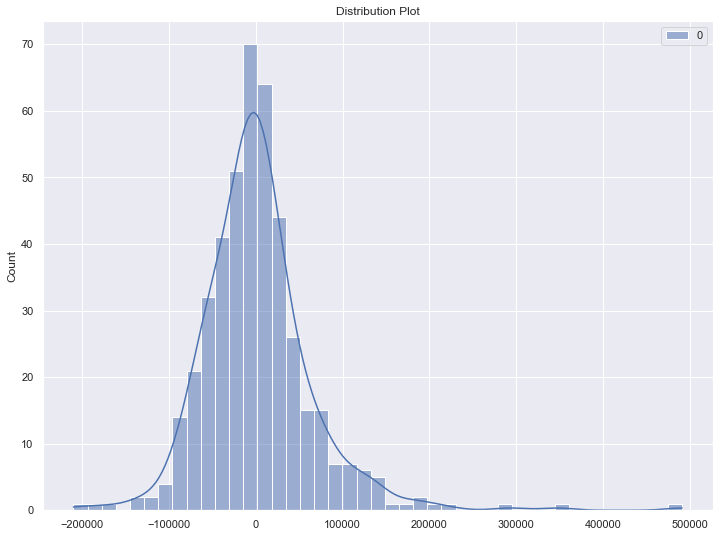

The MSLE is: 0.013464547195858037.
The R2 Score is: 0.40386333133065766.



In [8]:
x = df['GarageCars'].values.reshape(-1,1)
y = df['SalePrice'].values.reshape(-1,1)

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3, random_state=42)

regressor = LinearRegression()
regressor.fit(xTrain, yTrain)
yPred = regressor.predict(xTest)

plt.scatter(yTest, yPred, color='blue', marker='o', s=25)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual Values vs Predicted Values')
plt.show()

sns.histplot(yTest-yPred,kde=True).set_title("Distribution Plot")
plt.show()

print('The MSLE is: '+str((mean_squared_log_error(yTest,yPred))**2)+'.')
print('The R2 Score is: '+str(r2_score(yTest,yPred))+'.\n')

### Linear Regression SalePrice Vs TotalbsmtSF

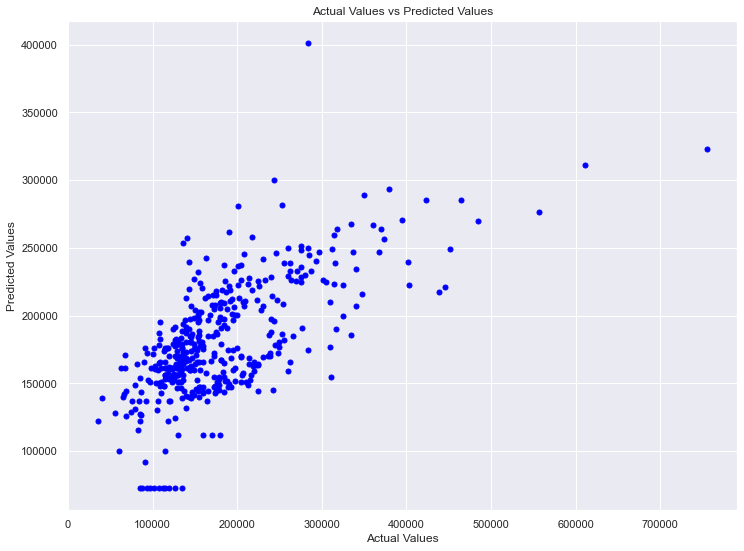

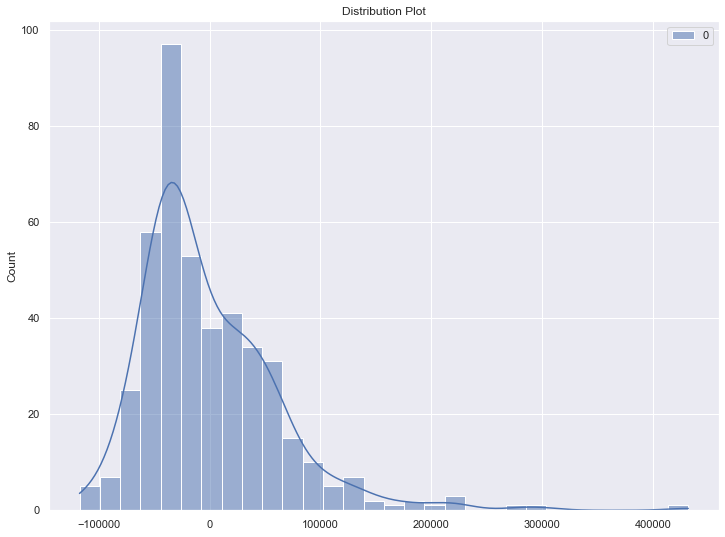

The MSLE is: 0.011107513391153364.
The R2 Score is: 0.4263960492654775.



In [9]:
x = df['TotalBsmtSF'].values.reshape(-1,1)
y = df['SalePrice'].values.reshape(-1,1)

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3, random_state=42)

regressor = LinearRegression()
regressor.fit(xTrain, yTrain)
yPred = regressor.predict(xTest)

plt.scatter(yTest, yPred, color='blue', marker='o', s=25)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual Values vs Predicted Values')
plt.show()

sns.histplot(yTest-yPred,kde=True).set_title("Distribution Plot")
plt.show()

print('The MSLE is: '+str((mean_squared_log_error(yTest,yPred))**2)+'.')
print('The R2 Score is: '+str(r2_score(yTest,yPred))+'.\n')

### Correlation Plot for the remaining fields
• Our main purpose for plotting this correlation heatmap is to select the least collinear variables.

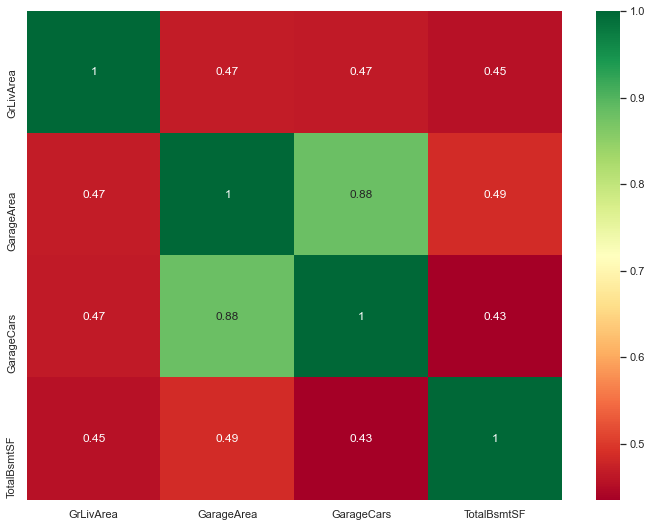


Sum of correlation with other fields: 

TotalBsmtSF    1.376119
GrLivArea      1.391113
GarageCars     1.784308
GarageArea     1.838138
dtype: float64


In [10]:
df1=df[['GrLivArea','GarageArea','GarageCars','TotalBsmtSF']]
new_1corr=df1.corr()
sns.heatmap(new_1corr,xticklabels=True,yticklabels=True,annot=True,cmap='RdYlGn')
plt.show()
print('\nSum of correlation with other fields: \n')
print((new_1corr.sum(axis=1)-1).sort_values())

• As GarageCars and GarageArea are highly correlated, we'll eliminate GarageArea because it's relatively more collinear with other variables.

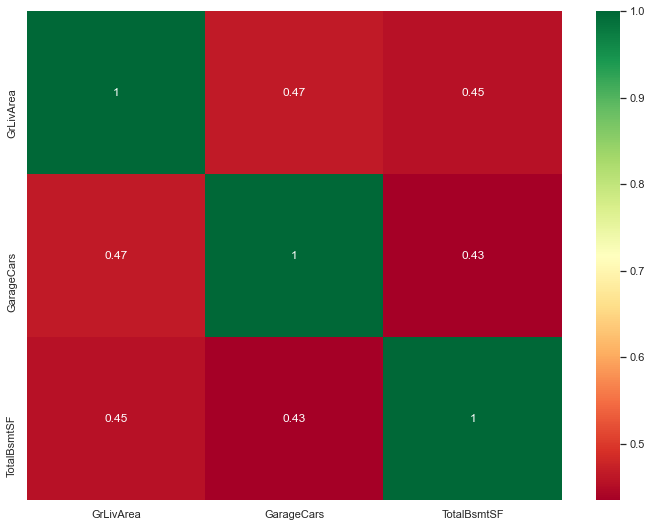


Sum of correlation with other fields: 

TotalBsmtSF    0.889453
GarageCars     0.901832
GrLivArea      0.922116
dtype: float64


In [11]:
df1=df1.drop(columns=['GarageArea'])
new_1corr=df1.corr()
sns.heatmap(new_1corr,xticklabels=True,yticklabels=True,annot=True,cmap='RdYlGn')
plt.show()
print('\nSum of correlation with other fields: \n')
print((new_1corr.sum(axis=1)-1).sort_values())

• These are our final 4 features which we'll use to fit our multiple linear regression model.

### Multiple Linear Regression with most correlated variables

In [12]:
x = df[['GrLivArea','GarageCars','TotalBsmtSF']]
y = df['SalePrice']
#SPLITTING DATASET INTO TRAINING AND TESTING DATA
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3, random_state=42)

#CREATING OBJECT OF LINEAR REGRESSION TO BE USED FOR FITTING AND PREDICTING
regressor = LinearRegression()
regressor.fit(xTrain, yTrain)
yPred = regressor.predict(xTest).reshape(-1,1)
print('The MSLE is: '+str((mean_squared_log_error(yTest,yPred))**2)+'.')
print('The R2 Score is: '+str(r2_score(yTest,yPred))+'.')

The MSLE is: 0.0028243513955069676.
The R2 Score is: 0.7280122425656288.


• Since the lowest and highest values of MSLE and R2 Score respectively were achieved using Multiple Linear Regression with GrLivArea, GarageCars and TotalBsmtSF, we'll be using this as our final model to predict the Sale Price based on the values input by the user below.

### User Input

In [13]:
def Prediction(feat1,feat2,feat3):
    pred=regressor.predict([[feat1,feat2,feat3]])[0]
    out=widgets.ToggleButtons(options=[('$'+str(int(pred)))],description='Predicted Selling Price: ',disabled=False,button_style='')
    return out

GrLivArea Range 300-6000<br>
TotalBsmtSF Range 0-7000<br>
GarageCars Range 0-6<br>

In [14]:
GrLivArea=widgets.BoundedIntText(
    min=300,
    max=6000,
    step=1,
    value=1500,
    description='GrLivArea: ',
    disabled=False)

TotalBsmtSF=widgets.BoundedIntText(
    min=0,
    max=7000,
    step=1,
    value=1000,
    description='TotalBsmtSF: ',
    disabled=False)

GarageCars=widgets.BoundedIntText(
    min=0,
    max=6,
    step=1,
    value=2,
    description='GarageCars: ',
    disabled=False)

widgets.interact(Prediction,feat1=GrLivArea,feat2=GarageCars,feat3=TotalBsmtSF)

interactive(children=(BoundedIntText(value=1500, description='GrLivArea: ', max=6000, min=300), BoundedIntText…

<function __main__.Prediction(feat1, feat2, feat3)>